In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='NObeyesdad', ylabel='count'>

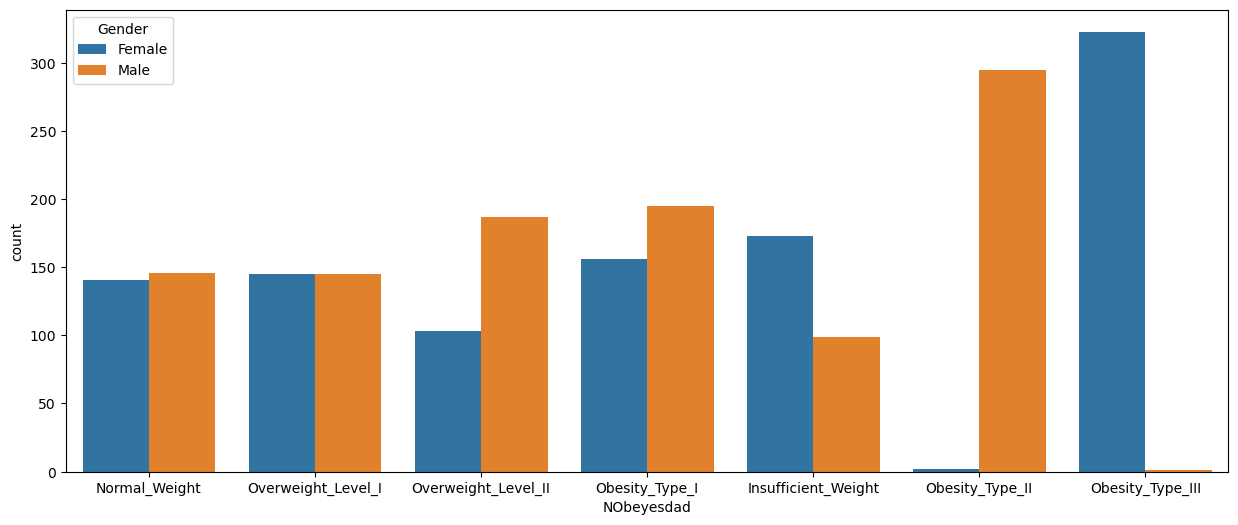

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, hue='Gender', x='NObeyesdad')

In [14]:
import scipy.stats as stats
contingency_table = pd.crosstab(df["Gender"], df["NObeyesdad"])

In [15]:
contingency_table

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


In [20]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# To determine if gender and obesity are dependent, we check the p-value
# if p-value is less than 0.05, we reject the null hypothesis (which means that the two variables are dependent)
# if p-value is greater than 0.05, we fail to reject the null hypothesis (which means that the two variables are independent)

In [4]:
binary_cols = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

for col in binary_cols:
    df[col] = df[col].map({"Male" : 1, "Female" : 0, "yes" : 1, "no" : 0})

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")
ohe_transformed = ohe.fit_transform(df[["CAEC", "CALC", "MTRANS"]])

In [7]:
ohe_transformed.head()

,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df = pd.concat([df, ohe_transformed], axis=1).drop(["CAEC", "CALC", "MTRANS"], axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,21,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,23,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,27,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,22,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
le = LabelEncoder()
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])

In [10]:
print(le.classes_)
# Labeling starts from 0
df["NObeyesdad"]

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int32

### Transofrming the data

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [12]:
X = df.drop(columns=["NObeyesdad"], axis=1)
y = df["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

### Training the model and making predictions

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [15]:
model.fit(X_train_norm, y_train)

LogisticRegression()

In [16]:
predictions = model.predict(X_test_norm)

In [17]:
predictions

array([0, 4, 0, 0, 5, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 2, 4, 3, 3, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 6, 2, 1, 0, 4, 2, 1, 0, 1, 0, 3, 1, 1,
       5, 0, 3, 5, 2, 3, 1, 0, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 3, 2,
       1, 4, 0, 1, 6, 2, 0, 0, 6, 3, 3, 5, 4, 3, 1, 2, 3, 3, 2, 2, 1, 5,
       1, 6, 6, 3, 0, 1, 2, 0, 5, 2, 1, 3, 3, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 5, 4, 3, 2, 5, 6, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 1, 2, 6, 5, 0, 0, 0, 3, 2, 4, 0, 2, 0, 0, 0, 3,
       2, 6, 6, 6, 0, 0, 5, 0, 2, 0, 3, 0, 3, 5, 5, 6, 5, 6, 3, 4, 2, 6,
       2, 6, 2, 1, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 3, 4, 5, 2, 0, 2, 3, 0, 5, 2, 3, 2,
       4, 6, 3, 1, 3, 6, 0, 4, 5, 6, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 6, 3, 1, 2, 2, 0, 5, 2, 0, 6, 1, 6, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 5, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 5, 2, 0, 6, 3, 3, 6, 6, 1,

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test, predictions)
print("Accuracy =", score)

Accuracy = 0.8676122931442081


In [19]:
cm = confusion_matrix(y_test, predictions)
cm

array([[56,  0,  0,  0,  0,  0,  0],
       [ 9, 39,  0,  0,  0, 11,  3],
       [ 0,  0, 69,  7,  0,  0,  2],
       [ 0,  0,  2, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  5,  0,  0,  0, 41, 10],
       [ 0,  0,  3,  0,  0,  4, 43]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

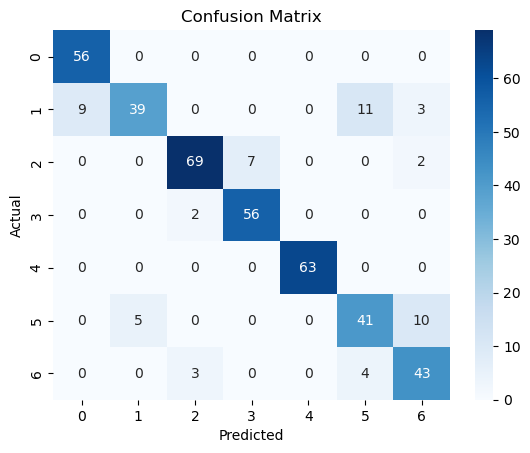

In [20]:
from seaborn import heatmap
heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### Feature Engineering (Adding BMI column)

In [51]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

In [52]:
df[["BMI", "Weight", "Height"]].head()

,BMI,Weight,Height
0,24.386526,64.0,1.62
1,24.238227,56.0,1.52
2,23.765432,77.0,1.80
3,26.851852,87.0,1.80
4,28.342381,89.8,1.78


In [55]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
0,0,21,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.386526
1,0,21,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.238227
2,1,23,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.765432
3,1,27,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.851852
4,1,22,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.342381


In [56]:
X = df.drop(columns=["NObeyesdad"], axis=1)
y = df["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler2 = StandardScaler()
X_train_norm = scaler2.fit_transform(X_train)
X_test_norm = scaler2.transform(X_test)

In [58]:
model2 = LogisticRegression()
model2.fit(X_train_norm, y_train)

LogisticRegression()

In [59]:
predictions2 = model2.predict(X_test_norm)

In [60]:
score2 = accuracy_score(y_test, predictions2)
print("Accuracy after feature engineering =", score2)

Accuracy after feature engineering = 0.900709219858156


In [61]:
cm2 = confusion_matrix(y_test, predictions2)
cm2

array([[56,  0,  0,  0,  0,  0,  0],
       [ 7, 46,  0,  0,  0,  7,  2],
       [ 0,  0, 71,  5,  0,  0,  2],
       [ 0,  0,  2, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  3,  0,  0,  0, 44,  9],
       [ 0,  0,  1,  0,  0,  4, 45]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

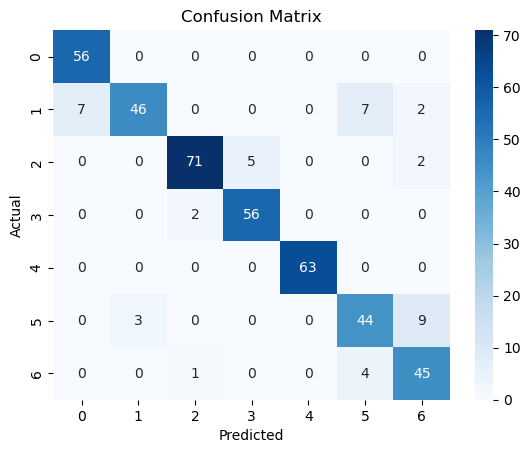

In [62]:
cm2_heatmap = heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions2, average='weighted')
recall = recall_score(y_test, predictions2, average='weighted')
f1 = f1_score(y_test, predictions2, average='weighted')

print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1)

Precision = 0.9046305019760965
Recall = 0.900709219858156
F1 Score = 0.8997943005913496
